# Pinapple Leaf Disease Model Detection Coding

In [20]:
#Import all the library needed
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

# Data Preprocessing

In [2]:
class_names = ['Leaf Spot', 'Mealybug Wilt', 'Pink Disease']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

# Define images size
IMAGE_SIZE = (270, 270)

In [33]:
def load_data():
    
    datasets = [r"C:\Users\User\Desktop\Pineapple Leaf Disease Dataset\Training", r"C:\Users\User\Desktop\Pineapple Leaf Disease Dataset\Testing"]
    output = []
    
    # Loop through data training and data test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Loop through each type of folder
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Loop through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the image to desired size
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Add the image and its label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [34]:
#Load the data
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\User\Desktop\Pineapple Leaf Disease Dataset\Training


100%|████████████████████████████████████████████████████████████████████████████████| 295/295 [00:25<00:00, 11.46it/s]


Loading C:\Users\User\Desktop\Pineapple Leaf Disease Dataset\Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:07<00:00,  9.91it/s]


In [35]:
# Make traing image random
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [36]:
# Diplay the number of training, testing available & image size
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Training number examples: {}".format(n_train))
print ("Testing number examples: {}".format(n_test))
print ("Image size: {}".format(IMAGE_SIZE))

Training number examples: 853
Testing number examples: 213
Image size: (270, 270)


In [37]:
# Normalizing the pixel values of the train_images and test_images arrays (make it 0 and 1)
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Data Visualization

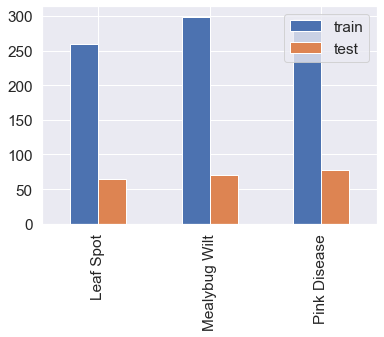

In [38]:
# Count each unique class label in the train_labels and test_labels arrays

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [39]:
#display an image and try classify it based on the label
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

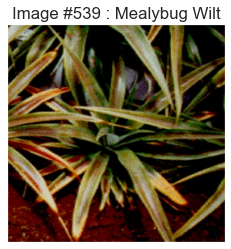

In [40]:
display_random_image(class_names, train_images, train_labels)

In [41]:
#display 25 image and try classify it base on its labels
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

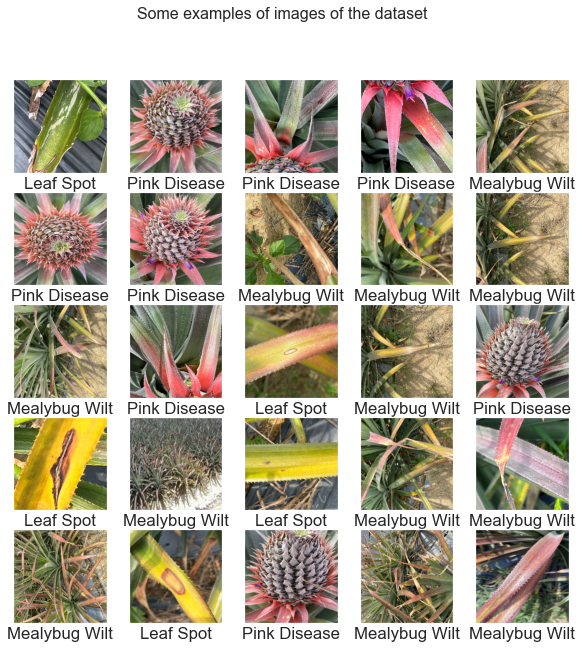

In [42]:
display_examples(class_names, train_images, train_labels)

# Building Pineapple Leaf Disease Model

In [68]:
# CNN Model 8
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(270, 270, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.91),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with an early stopping
history = model.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels), callbacks=[early_stop])

Epoch 1/40
27/27 [==============================] - 65s 2s/step - loss: 2.4630 - accuracy: 0.3294 - val_loss: 1.0907 - val_accuracy: 0.4507
Epoch 2/40
27/27 [==============================] - 65s 2s/step - loss: 1.0027 - accuracy: 0.4584 - val_loss: 0.7730 - val_accuracy: 0.8310
Epoch 3/40
27/27 [==============================] - 69s 3s/step - loss: 0.8556 - accuracy: 0.4947 - val_loss: 0.5676 - val_accuracy: 0.9202
Epoch 4/40
27/27 [==============================] - 66s 2s/step - loss: 0.7895 - accuracy: 0.5275 - val_loss: 0.3316 - val_accuracy: 0.9437
Epoch 5/40
27/27 [==============================] - 67s 2s/step - loss: 0.7475 - accuracy: 0.6073 - val_loss: 0.2315 - val_accuracy: 0.9624
Epoch 6/40
27/27 [==============================] - 64s 2s/step - loss: 0.6719 - accuracy: 0.6413 - val_loss: 0.2190 - val_accuracy: 0.9624
Epoch 7/40
27/27 [==============================] - 64s 2s/step - loss: 0.7036 - accuracy: 0.6600 - val_loss: 0.2557 - val_accuracy: 0.9108
Epoch 8/40
27/27 [==

In [ ]:
# Obtain the model's predictions
predictions = model.predict(test_images)

# Apply the confidence threshold
threshold = 0.75
filtered_predictions = predictions * (predictions >= threshold)

# Convert the filtered predictions to class labels
filtered_labels = np.argmax(filtered_predictions, axis=1)

# Visualize the accuracy and loss during training & testing

In [69]:
# Plot the accuracy and the loss during the training
def plot_accuracy_loss(history):
    
    # Creates new figure
    fig = plt.figure(figsize=(20,15))

    # Plot the accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "validation_accuracy")
    plt.title("training_accuracy vs validation_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot the loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "validation_loss")
    plt.title("training_loss vs validation_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

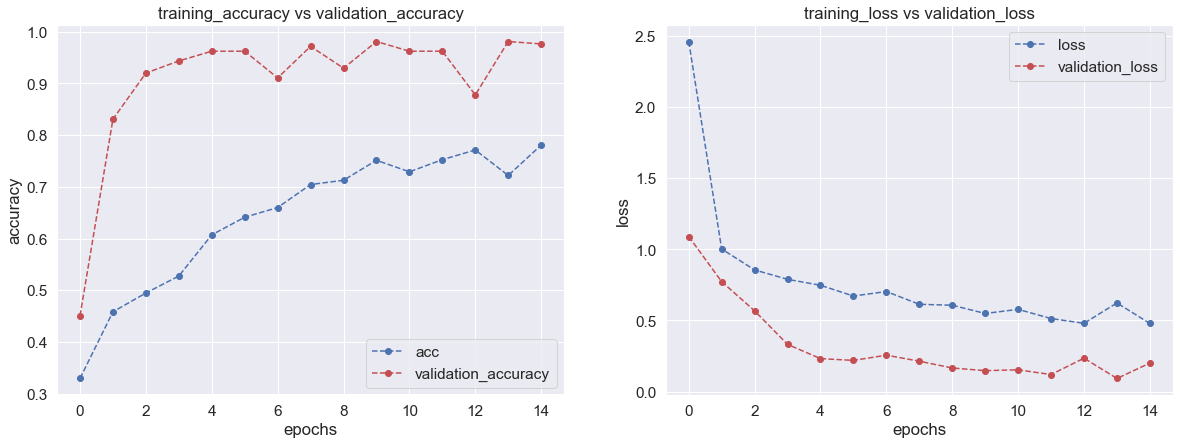

In [70]:
# Display it
plot_accuracy_loss(history)

# Evaluation of the model

In [71]:
# Evaluate model accuracy on test dataset
test_accuracy, test_loss = model.evaluate(test_images, test_labels)

7/7 [==============================] - 4s 500ms/step - loss: 0.1470 - accuracy: 0.9812


7/7 [==============================] - 4s 491ms/step


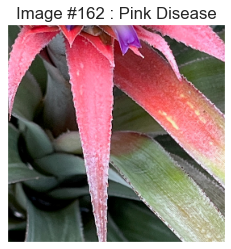

In [72]:
# Count the vector of probabilities
predictions = model.predict(test_images) 
# Take the highest probability
pred_labels = np.argmax(predictions, axis = 1) 

display_random_image(class_names, test_images, pred_labels)

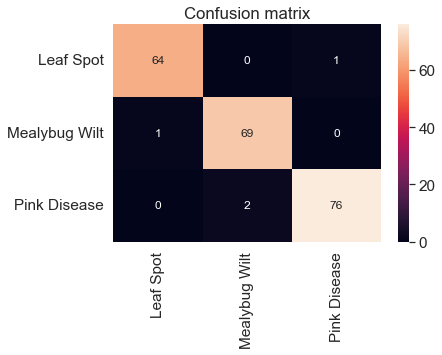

In [73]:
# Confusion Matrix
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 12}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [74]:
# Compute the classification report
class_names = ["Leaf Spot", "Mealybug Wilt", "Pink Disease"]
report = classification_report(test_labels, pred_labels, target_names=class_names)

# Display the classification report
print("Pineapple Leaf Disease Model Report:")
print(report)

Pineapple Leaf Disease Model Report:
               precision    recall  f1-score   support

    Leaf Spot       0.98      0.98      0.98        65
Mealybug Wilt       0.97      0.99      0.98        70
 Pink Disease       0.99      0.97      0.98        78

     accuracy                           0.98       213
    macro avg       0.98      0.98      0.98       213
 weighted avg       0.98      0.98      0.98       213



In [75]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("pineappleV8.4.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmppurc0we7\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmppurc0we7\assets
